In [1]:
import uproot

In [2]:
import sys
import os

path = os.path.abspath(".")
sys.path.insert(0, os.path.dirname(path))
sys.path

['/gwpool/users/gpizzati/test_processor/my_processor',
 '/gwpool/users/gpizzati/test_processor/my_processor/notebooks',
 '/gwpool/users/gpizzati/mambaforge/envs/test_uproot/lib/python310.zip',
 '/gwpool/users/gpizzati/mambaforge/envs/test_uproot/lib/python3.10',
 '/gwpool/users/gpizzati/mambaforge/envs/test_uproot/lib/python3.10/lib-dynload',
 '',
 '/gwpool/users/gpizzati/mambaforge/envs/test_uproot/lib/python3.10/site-packages']

In [3]:
from framework import read_events, read_chunks

In [4]:
chunks = read_chunks("../condor/job_0/chunks_job.pkl")

In [5]:
events = read_events(
    **{k: v for k, v in chunks[1].items() if k != "dataset" and k != "xs"}
)

start reading
created events


In [6]:
import awkward as ak
import numpy as np

In [7]:
ak.fields(events)

['Jet',
 'GenPart',
 'GenJet',
 'Electron',
 'Muon',
 'fixedGridRhoFastjetAll',
 'HLT',
 'Flag',
 'genWeight',
 'LHEScaleWeight',
 'LHEPdfWeight',
 'Pileup',
 'run',
 'luminosityBlock']

In [8]:
ak.fields(events.Jet)

['pt',
 'eta',
 'phi',
 'mass',
 'jetId',
 'puId',
 'genJetIdx',
 'rawFactor',
 'area',
 'btagDeepFlavB',
 'hadronFlavour']

In [10]:
columns = []
for column_base in ak.fields(events):
    column_suffixes = ak.fields(events[column_base])
    if len(column_suffixes) == 0:
        columns.append((column_base,))
    else:
        for column_suffix in column_suffixes:
            columns.append((column_base, column_suffix))
columns

[('Jet', 'pt'),
 ('Jet', 'eta'),
 ('Jet', 'phi'),
 ('Jet', 'mass'),
 ('Jet', 'jetId'),
 ('Jet', 'puId'),
 ('Jet', 'genJetIdx'),
 ('Jet', 'rawFactor'),
 ('Jet', 'area'),
 ('Jet', 'btagDeepFlavB'),
 ('Jet', 'hadronFlavour'),
 ('GenPart', 'pt'),
 ('GenPart', 'eta'),
 ('GenPart', 'phi'),
 ('GenPart', 'mass'),
 ('GenPart', 'pdgId'),
 ('GenPart', 'status'),
 ('GenPart', 'genPartIdxMother'),
 ('GenPart', 'statusFlags'),
 ('GenJet', 'pt'),
 ('GenJet', 'eta'),
 ('GenJet', 'phi'),
 ('GenJet', 'mass'),
 ('Electron', 'pt'),
 ('Electron', 'eta'),
 ('Electron', 'phi'),
 ('Electron', 'pdgId'),
 ('Electron', 'mvaFall17V2Iso_WP90'),
 ('Electron', 'convVeto'),
 ('Electron', 'pfRelIso03_all'),
 ('Electron', 'cutBased'),
 ('Electron', 'sieie'),
 ('Electron', 'eInvMinusPInv'),
 ('Electron', 'dxy'),
 ('Electron', 'dz'),
 ('Muon', 'pt'),
 ('Muon', 'eta'),
 ('Muon', 'phi'),
 ('Muon', 'pdgId'),
 ('Muon', 'tightId'),
 ('Muon', 'pfRelIso04_all'),
 ('Muon', 'dxy'),
 ('Muon', 'dz'),
 ('Muon', 'genPartIdx'),
 ('Muo

In [11]:
events[('luminosityBlock',)]

<Array [6416, 6416, 6416, 6416, ..., 2078, 2078, 2078] type='100000 * uint32'>

In [12]:
def get_columns(events):
    columns = []
    for column_base in ak.fields(events):
        column_suffixes = ak.fields(events[column_base])
        if len(column_suffixes) == 0:
            columns.append((column_base,))
        else:
            for column_suffix in column_suffixes:
                columns.append((column_base, column_suffix))
    return columns

In [13]:
get_columns(events)

[('Jet', 'pt'),
 ('Jet', 'eta'),
 ('Jet', 'phi'),
 ('Jet', 'mass'),
 ('Jet', 'jetId'),
 ('Jet', 'puId'),
 ('Jet', 'genJetIdx'),
 ('Jet', 'rawFactor'),
 ('Jet', 'area'),
 ('Jet', 'btagDeepFlavB'),
 ('Jet', 'hadronFlavour'),
 ('GenPart', 'pt'),
 ('GenPart', 'eta'),
 ('GenPart', 'phi'),
 ('GenPart', 'mass'),
 ('GenPart', 'pdgId'),
 ('GenPart', 'status'),
 ('GenPart', 'genPartIdxMother'),
 ('GenPart', 'statusFlags'),
 ('GenJet', 'pt'),
 ('GenJet', 'eta'),
 ('GenJet', 'phi'),
 ('GenJet', 'mass'),
 ('Electron', 'pt'),
 ('Electron', 'eta'),
 ('Electron', 'phi'),
 ('Electron', 'pdgId'),
 ('Electron', 'mvaFall17V2Iso_WP90'),
 ('Electron', 'convVeto'),
 ('Electron', 'pfRelIso03_all'),
 ('Electron', 'cutBased'),
 ('Electron', 'sieie'),
 ('Electron', 'eInvMinusPInv'),
 ('Electron', 'dxy'),
 ('Electron', 'dz'),
 ('Muon', 'pt'),
 ('Muon', 'eta'),
 ('Muon', 'phi'),
 ('Muon', 'pdgId'),
 ('Muon', 'tightId'),
 ('Muon', 'pfRelIso04_all'),
 ('Muon', 'dxy'),
 ('Muon', 'dz'),
 ('Muon', 'genPartIdx'),
 ('Muo

In [14]:
part1.root'

In [15]:
f = uproot.open(fname)

In [7]:
import awkward as ak

In [105]:
fname_base = '/eos/cms/store/group/phys_higgs/cmshww/amassiro/HWWNano/Summer20UL18_106x_nAODv9_Full2018v9/MCl1loose2018v9__MCCorr2018v9NoJERInHorn__l2tightOR2018v9/nanoLatino_DYJetsToLL_M-50__'
fname_list = [fname_base + f'part{i}.root' for i in range(1,8)]

In [106]:
def branch(columns):
    arr = 0
    for fname in fname_list:
        f = uproot.open(fname)
        d = {}
        for column in columns:
            d[column] = f['Events'][column].array()
        _arr = ak.zip(d, depth_limit=1)
        print(len(_arr))
        if isinstance(arr, int):
            arr = _arr
        else:
            arr = ak.concatenate([arr, _arr], axis=0)
        f.close()

    return arr

In [107]:
events = branch([
                'XSWeight',
                'Lepton_RecoSF',
                'TriggerSFWeight_2l',
                'LepSF2l__ele_mvaFall17V2Iso_WP90__mu_cut_Tight_HWWW',
                'Lepton_pt',
                'Lepton_pdgId',
                 ])

9184
4212
12090
5029
46678
159212
16865


In [108]:
originalEvents = ak.copy(events)

In [109]:
events = ak.copy(originalEvents)

In [110]:
events = events[ak.num(events.Lepton_pt)>=2]

In [111]:
events = events[((events.Lepton_pt[:, 0] > 25) 
                & (events.Lepton_pt[:, 1] > 15))]

In [112]:
events['ee'] = (events.Lepton_pdgId[:, 0] * events.Lepton_pdgId[:, 1]) == -11*11
events['mm'] = (events.Lepton_pdgId[:, 0] * events.Lepton_pdgId[:, 1]) == -13*13

In [113]:
genWeight = events['XSWeight']
recoSF    = events['Lepton_RecoSF']
trig_SF   = events['TriggerSFWeight_2l']
id_iso_SF = events['LepSF2l__ele_mvaFall17V2Iso_WP90__mu_cut_Tight_HWWW']
lep_pt    = events['Lepton_pt']
lep_pdgId = events['Lepton_pdgId']

In [114]:
import hist

In [115]:
h = hist.Hist(
    hist.axis.Regular(30, 25, 100, name='pt1'),
    hist.axis.Regular(30, 15, 100, name='pt2'),
    hist.axis.StrCategory(['no_corr', 'reco_sf', 'id_iso_sf', 'trig_sf', 'all_corr'], name='corr'),
    hist.axis.StrCategory(['ee', 'mm'], name='category'),
    hist.storage.Weight()
)

In [116]:
base_weight = genWeight
weights = {
    'no_corr': base_weight,
    'reco_sf': base_weight * recoSF[:, 0]*recoSF[:, 1],
    'id_iso_sf': base_weight * id_iso_SF,
    'trig_sf': base_weight * trig_SF,
    'all_corr': base_weight * recoSF[:, 0]*recoSF[:, 1]*trig_SF * id_iso_SF,
}

In [117]:
pt1 = lep_pt[:, 0]
pt2 = lep_pt[:, 1]

In [118]:
for t in weights:
    for category in ['ee', 'mm']:
        mask = events[category]
        h.fill(pt1=pt1[mask], pt2=pt2[mask], corr=t, category=category, weight=weights[t][mask])

In [119]:
h

Hist(
  Regular(30, 25, 100, name='pt1'),
  Regular(30, 15, 100, name='pt2'),
  StrCategory(['no_corr', 'reco_sf', 'id_iso_sf', 'trig_sf', 'all_corr'], name='corr'),
  StrCategory(['ee', 'mm'], name='category'),
  storage=Weight()) # Sum: WeightedSum(value=36387.3, variance=2413.93) (WeightedSum(value=37119.7, variance=2495.68) with flow)

In [120]:
import matplotlib.pyplot as plt

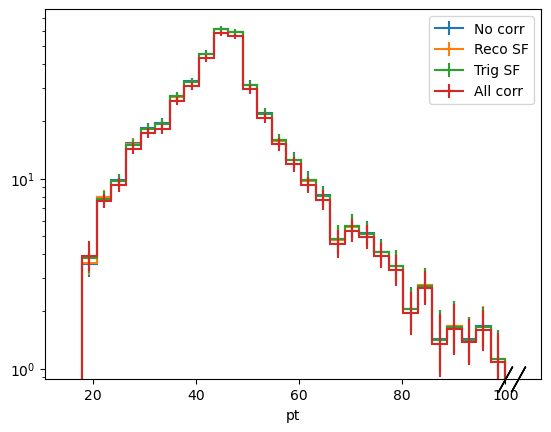

In [110]:
h[:, hist.loc('no_corr')].plot(label='No corr')
h[:, hist.loc('reco_sf')].plot(label='Reco SF')
h[:, hist.loc('trig_sf')].plot(label='Trig SF')
h[:, hist.loc('all_corr')].plot(label='All corr')
plt.yscale('log')
plt.legend()

In [44]:
import numpy as np

In [121]:
histos = {
    'pt1': (slice(None), sum),
    'pt2': (sum, slice(None)),
}

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fe27891c460>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

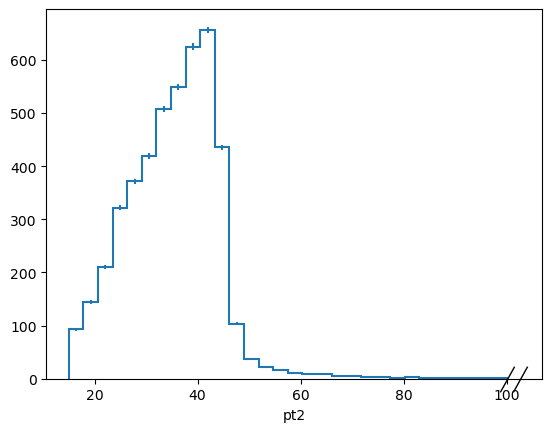

In [129]:
h[(*histos['pt2'], hist.loc(t), hist.loc('mm'))].plot()

In [123]:
h[(slice(None), sum, hist.loc(t), hist.loc('ee'))]

Hist(Regular(30, 25, 100, name='pt1'), storage=Weight()) # Sum: WeightedSum(value=2527.67, variance=154.641) (WeightedSum(value=2582.51, variance=160.675) with flow)

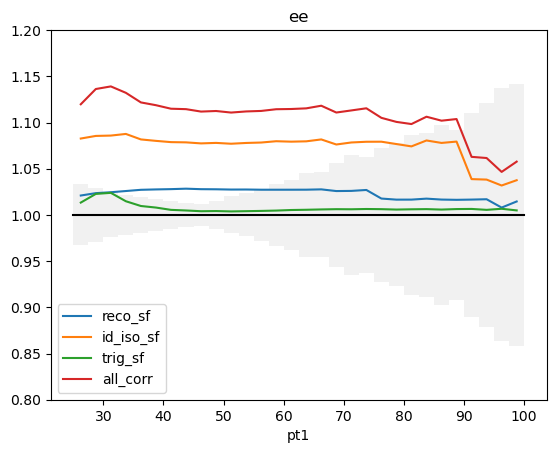

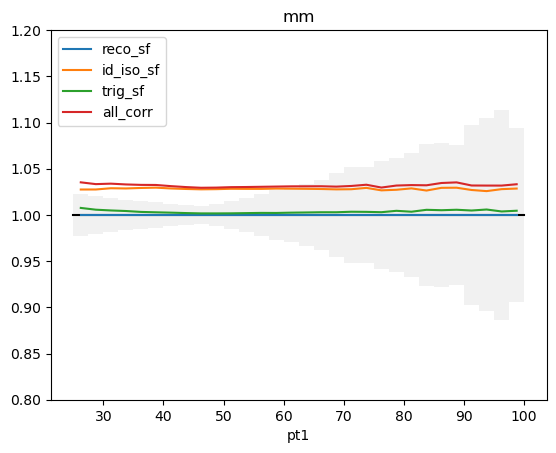

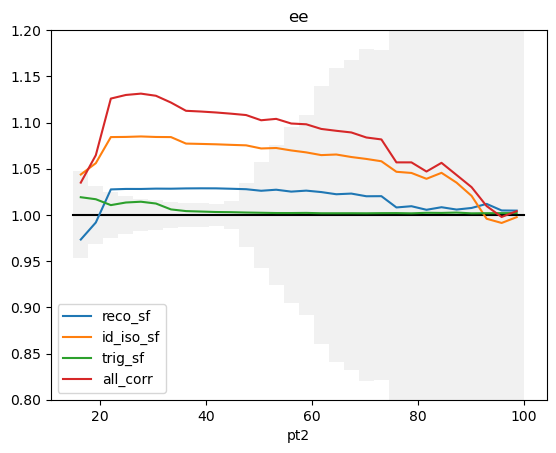

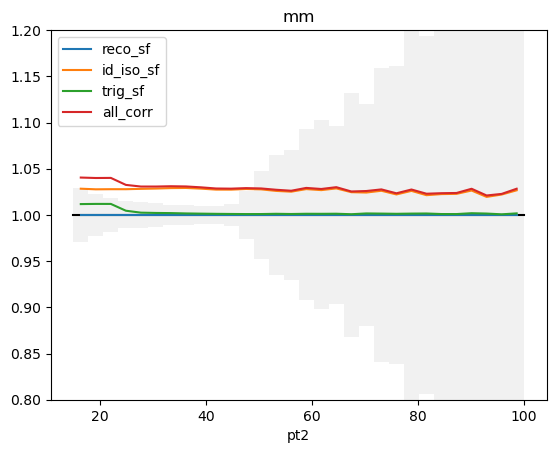

In [130]:
for i_var, variable in enumerate(histos):
    for category in ['ee', 'mm']:
        h_tuple = histos[variable]
        values = []
        for t in weights:
            values.append(h[(*histos[variable], hist.loc(t), hist.loc(category))].values())

        x = h.axes[i_var].centers
        edges = h.axes[i_var].edges

        stat = np.sqrt(h[(*histos[variable], hist.loc('no_corr'), hist.loc(category))].variances())

        up = (values[0] + stat)/values[0]
        do = (values[0] - stat)/values[0]
        plt.figure()
        for i, t in enumerate(weights):
            if i == 0:
                continue
            plt.errorbar(x, values[0]/values[i], label=t)
        plt.plot(edges, np.ones_like(edges), color='black')
        delta = 0.2
        plt.ylim(1-delta, 1+delta)
        plt.legend()
        plt.stairs(up, edges, baseline=do, fill=True, color='lightgrey', alpha=.3, zorder=-10)
        plt.xlabel(variable)
        plt.title(category)